# Python and R

This section is just some standard imports for python + R notebooks, you can skip reading it.

In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# show all columns on pandas dataframes
pd.set_option('display.max_columns', None)


In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%%R

# My commonly used R imports

require('tidyverse')


R[write to console]: Loading required package: tidyverse



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.1.4      ✔ stringr 1.4.0 
✔ readr   2.1.3      ✔ forcats 0.5.1 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# Read the data



The cell below loads the data in python:

In [4]:
df = pd.read_csv('raw-polls.csv')
df.sample(5)

,poll_id,question_id,race_id,year,race,location,type_simple,type_detail,pollster,pollster_rating_id,methodology,partisan,polldate,samplesize,cand1_name,cand1_id,cand1_party,cand1_pct,cand2_name,cand2_id,cand2_party,cand2_pct,cand3_pct,margin_poll,electiondate,cand1_actual,cand2_actual,margin_actual,bias,rightcall,comment
7317,34244,41873,1229,2014,2014_Gov-G_SD,SD,Gov-G,Gov-G,Monmouth University,215,Live Phone,NaN,10/26/14,429.0,Susan M. Wismer,8753,DEM,29.0,Dennis M. Daugaard,8750,REP,68.0,1.0,-39.0,11/4/14,25.43,70.47,-45.03,6.03,1.0,NaN
4351,16461,21358,710,2008,2008_Pres-G_CT,CT,Pres-G,Pres-G,YouGov,391,Online,NaN,10/25/08,704.0,Barack Obama,41,DEM,58.0,John McCain,44,REP,37.0,NaN,21.0,11/4/08,60.59,38.22,22.37,-1.37,1.0,among registered voters
9109,56586,91086,96,2018,2018_Sen-G_AZ,AZ,Sen-G,Sen-G,Ipsos,154,Online,NaN,10/22/18,799.0,Kyrsten Sinema,12409,DEM,46.0,Martha McSally,12410,REP,48.0,NaN,-2.0,11/6/18,49.96,47.61,2.34,-4.34,0.0,for Reuters | U. Virginia Center for Politics
602,6416,27199,1707,2000,2000_Sen-G_RI,RI,Sen-G,Sen-G,Brown University,35,Live Phone,NaN,10/22/00,370.0,Robert A. Weygand,3854,DEM,28.0,Lincoln Chafee,3855,REP,52.0,2.0,-24.0,11/7/00,41.15,56.88,-15.73,-8.27,1.0,NaN
5440,32893,39489,1537,2010,2010_Sen-G_PA,PA,Sen-G,Sen-G,TCJ Research,327,IVR,NaN,10/24/10,1000.0,Joe Sestak,1032,DEM,43.0,Patrick J. Toomey,2537,REP,49.0,NaN,-6.0,11/2/10,48.99,51.01,-2.02,-3.98,1.0,NaN


The cell below loads the same data in R:

In [37]:
%%R

df <- read_csv('raw-polls.csv') %>% filter(type_simple != 'Pres-P')

df

Rows: 10776 Columns: 31
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (14): race, location, type_simple, type_detail, pollster, methodology, p...
dbl (17): poll_id, question_id, race_id, year, pollster_rating_id, samplesiz...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 8,955 × 31
   poll_id questio…¹ race_id  year race  locat…² type_…³ type_…⁴ polls…⁵ polls…⁶
     <dbl>     <dbl>   <dbl> <dbl> <chr> <chr>   <chr>   <chr>   <chr>     <dbl>
 1   26013     87909    1455  1998 1998… NY      Gov-G   Gov-G   Blum &…      32
 2   26255     87926    1456  1998 1998… OH      Gov-G   Gov-G   Univer…     346
 3   26026     31266    1736  1998 1998… NV      Sen-G   Sen-G   FM3 Re…      91
 4   26013     31253    1738  1998 1998… NY      Sen-G   Sen-G   Blum &…      32
 5   63632    117103    1738  1998 1998… NY      Sen-G  

# Guided Exploration

In this section you'll make a few charts to explore the data. Here I will raise some questions for you to dig around in the data and answer. You can use summary statistics and/or charts to help answer the questions. You will have to make some methodological choices along the way. Be aware of what choices you're making! I'll ask you about them shortly.


## Question 1: How accurate are polls from the following pollsters?
Characterize the accuracy of each of these pollsters in a sentence or two. Then, write another few sentences justifying your characterization with insights from the data.
- Siena College/The New York Times Upshot
- Jayhawk Consulting
- Fox News/Beacon Research/Shaw & Co. Research
- Brown University
- American Research Group


👉 **Siena College/The New York Times Upshot** 

In [38]:
df.query('pollster=="Siena College/The New York Times Upshot"').head(2)

,poll_id,question_id,race_id,year,race,location,type_simple,type_detail,pollster,pollster_rating_id,methodology,partisan,polldate,samplesize,cand1_name,cand1_id,cand1_party,cand1_pct,cand2_name,cand2_id,cand2_party,cand2_pct,cand3_pct,margin_poll,electiondate,cand1_actual,cand2_actual,margin_actual,bias,rightcall,comment
8112,47325,74070,52,2016,2016_Gov-G_NC,NC,Gov-G,Gov-G,Siena College/The New York Times Upshot,448,Live Phone,NaN,10/22/16,792.0,Roy A. Cooper,8967,DEM,51.0,Pat McCrory,8959,REP,45.0,NaN,6.0,11/8/16,49.02,48.80,0.22,5.78,1.0,for New York Times | New York Times Upshot
8116,47325,74050,62,2016,2016_Sen-G_NC,NC,Sen-G,Sen-G,Siena College/The New York Times Upshot,448,Live Phone,NaN,10/22/16,792.0,Deborah K. Ross,10153,DEM,47.0,Richard Burr,8963,REP,46.0,NaN,1.0,11/8/16,45.37,51.06,-5.70,6.70,0.0,for New York Times | New York Times Upshot


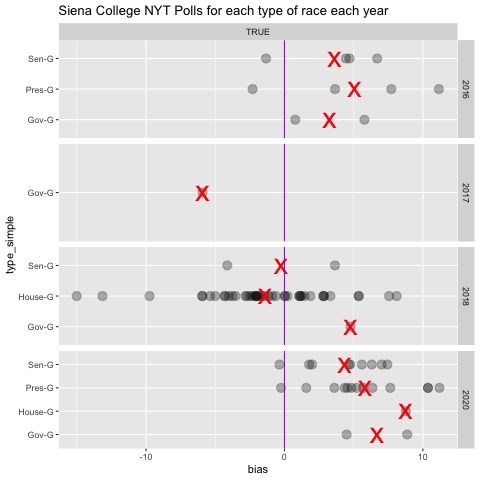

In [60]:
%%R 

# plot_type_1 is a function that plots the bias on polls for a particular pollster along with the mean bias

# define a function
#    - plot_type_1 is the name of the function
#    - pollster_to_plot is the input to the function
plot_type_1 <- function(pollster_to_plot) {

    # filter to only polls from that pollster
    pollster_df <- df %>% filter(pollster==pollster_to_plot)

    # plot them, along with the mean for each type of race in each year
    ggplot(pollster_df) +
        aes(x=bias, y=type_simple) +
        geom_point(size=4, alpha=.3) +
        stat_summary(fun.y=mean, geom="point", shape='x',
                     size=10, color="red", alpha=1) +
        geom_vline(aes(xintercept=0), color="purple") +
        facet_grid(year~pollster==pollster_to_plot, scales='free_y')
}


plot_type_1('Siena College/The New York Times Upshot') +
    labs(title="Siena College NYT Polls for each type of race each year")



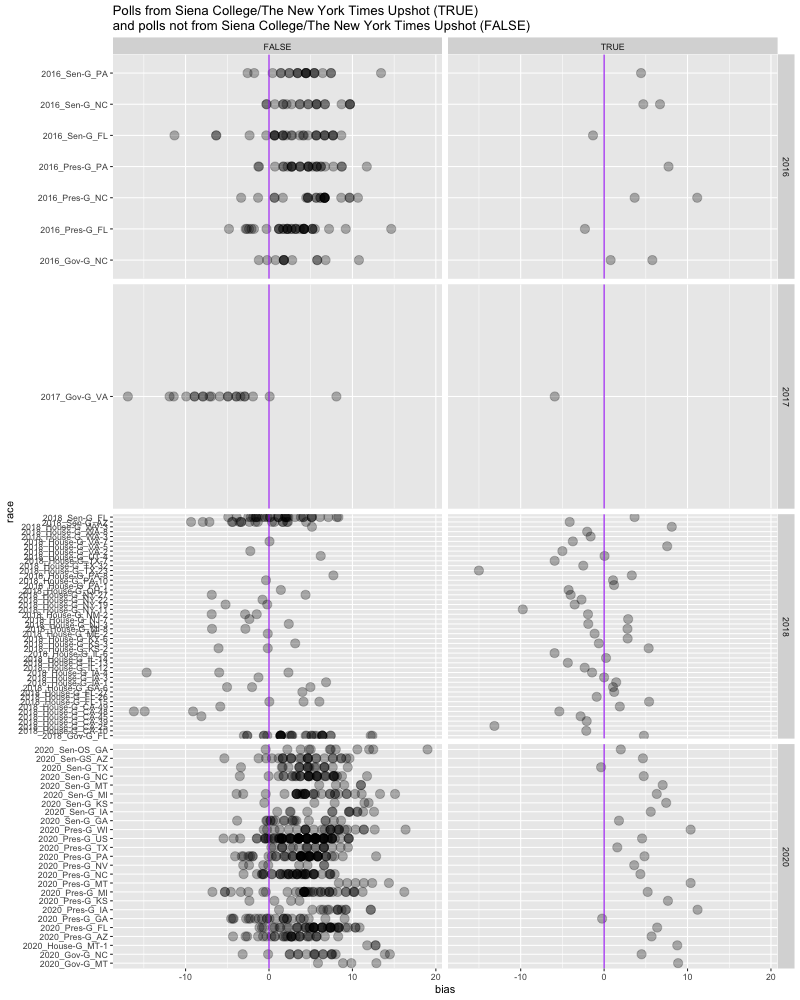

In [ ]:
%%R -w 800 -h 1000

# base_plot is a function that plots the bias on polls for a particular pollster
#           compared to polls from all other pollsters that have polled in the same race

# define a function
#     base_plot - name of this function
#     pollster_to_plot - input to this function
base_plot <- function(pollster_to_plot) {

    # filter to only polls from pollster_to_plot
    pollster_df <- df %>% filter(pollster==pollster_to_plot)

    # get a unique list of races where that pollster has polled
    only_races_this_pollster_has_polled <- pollster_df$race %>% unique()

    # get ALL polls from those races
    polls_from_races_this_pollster_has_polled <- df %>% 
        filter(race %in% only_races_this_pollster_has_polled)

    # plot them
    ggplot(polls_from_races_this_pollster_has_polled) +
        aes(x=bias, y=race) +
        geom_point(size=4, alpha=.3) +
        geom_vline(aes(xintercept=0), color="purple")
}


my_pollster <- 'Siena College/The New York Times Upshot'
base_plot(my_pollster)  +
        facet_grid(year~pollster==my_pollster, scales='free_y') +
        labs(title=paste("Polls from", my_pollster, "(TRUE) \nand polls not from", my_pollster,"(FALSE)"))


- not very far off, when they're off they're about as off as the average of all the other polls
- 2016 polls onwards only
- lots of polls for 2018 H

👉 **Jayhawk Consulting**

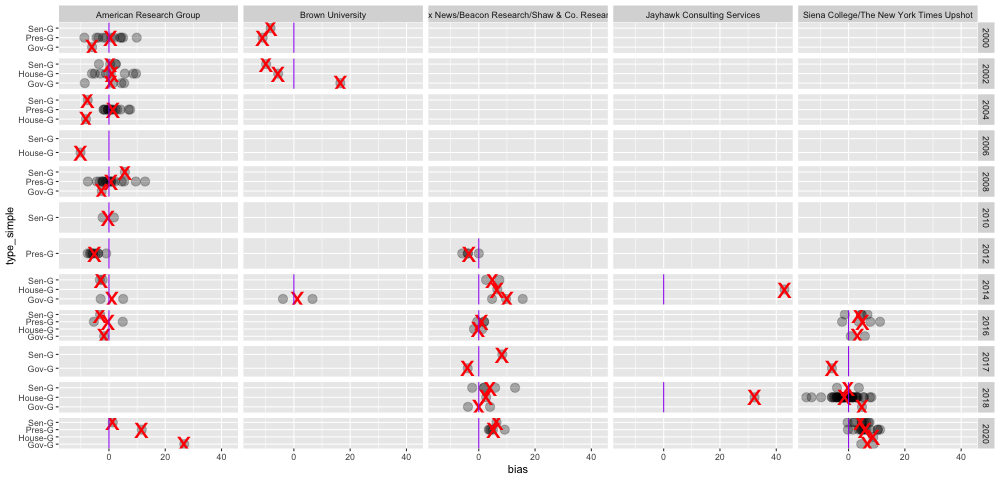

In [73]:
%%R -w 1000

pollsters_i_want <- c('Siena College/The New York Times Upshot', 
                      'Jayhawk Consulting Services','Brown University', 
                      'Fox News/Beacon Research/Shaw & Co. Research', 'American Research Group')

pollster_df <- df %>% filter(pollster %in% pollsters_i_want)

ggplot(pollster_df) +
    aes(x=bias, y=type_simple) +
    geom_point(size=4, alpha=.3) +
    stat_summary(fun.y=mean, geom="point", shape='x',
                 size=10, color="red", alpha=1) +
    geom_vline(aes(xintercept=0), color="purple") +
    facet_grid(year~pollster, scales='free_y') 

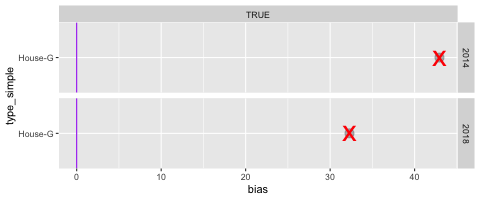

In [75]:
%%R -h 200

plot_type_1('Jayhawk Consulting Services')


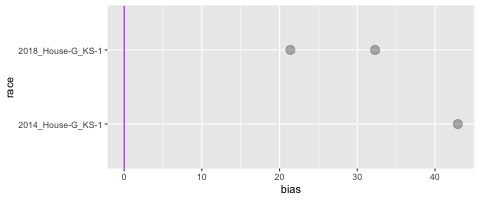

In [76]:
%%R -h 200

base_plot('Jayhawk Consulting Services')  


- seems to overestimate democrats, BUT there are only three polls, one from 2014 one from 2018 AND they only poll KS-1

👉 **Fox News/Beacon Research/Shaw & Co. Research**

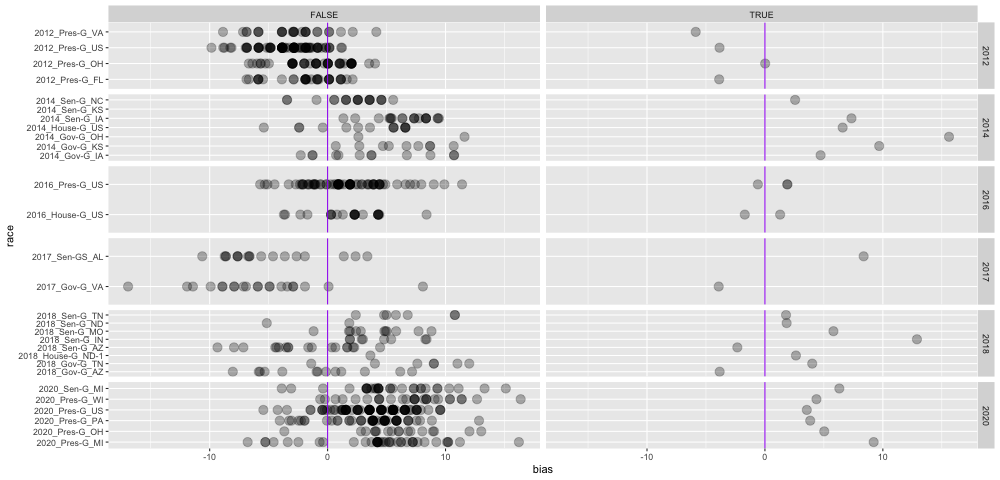

In [77]:
%%R -w 1000

base_plot('Fox News/Beacon Research/Shaw & Co. Research')   +
    facet_grid(year~pollster=='Fox News/Beacon Research/Shaw & Co. Research', scales='free_y') 


👉 **Brown University**

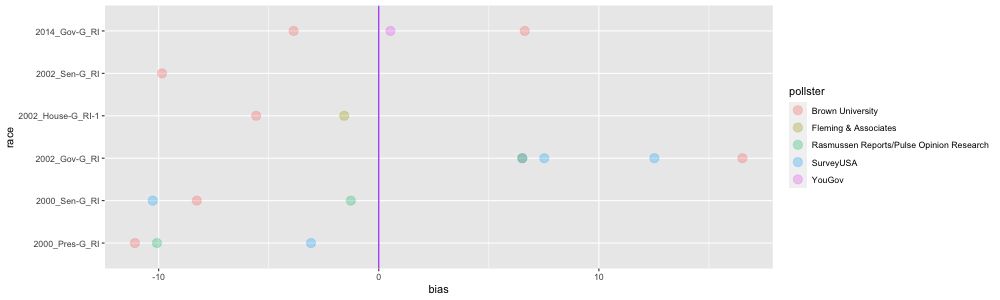

In [78]:
%%R -w 1000 -h 300

my_pollster <- 'Brown University'

base_plot(my_pollster)  + aes(color=pollster)


👉 **American Research Group**

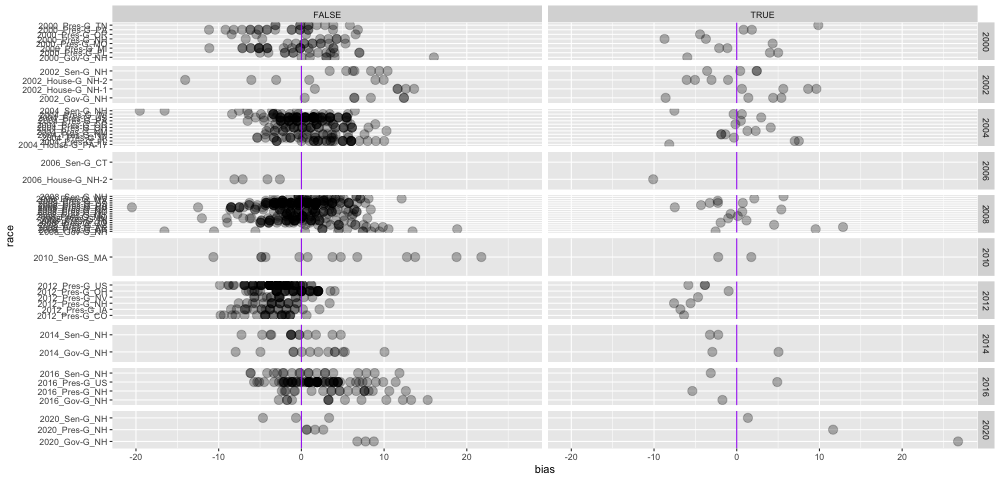

In [79]:
%%R -w 1000

base_plot('American Research Group')   +
    facet_grid(year~pollster=='American Research Group', scales='free_y') 


### Question 2: Which pollsters are the most accurate? Which are the least accurate?

In [87]:
import numpy as np

# PYTHON
my_pollsters=["American Research Group", 
              "Brown University", 
              "Fox News/Beacon Research/Shaw & Co. Research", 
              'Siena College/The New York Times Upshot', 
              'Jayhawk Consulting Services']


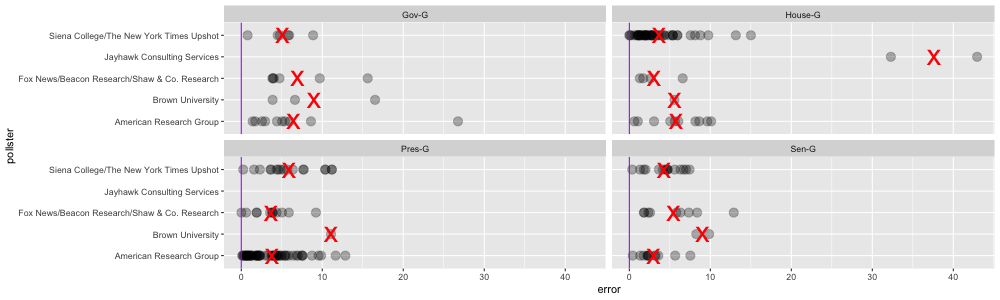

In [95]:
%%R -w 1000 -h 300 

# SAME THING IN R
pollsters_i_want <- c('Siena College/The New York Times Upshot', 
                      'Jayhawk Consulting Services',
                      'Brown University', 
                      'Fox News/Beacon Research/Shaw & Co. Research', 
                      'American Research Group')

# Filter to just these pollsters
# Mutate to create a new variable (error = absolute value of bias)
pollster_df <- df %>% 
    filter(pollster %in% pollsters_i_want) %>%
    mutate(error = abs(bias))

# plot (remember, this is excluding year, that's a methodological choice...
#       and maybe not a great one)
ggplot(pollster_df) +
    aes(x=error, y=pollster) +
    geom_point(size=4, alpha=.3) +
    stat_summary(fun.y=mean, geom="point", shape='x',
                 size=10, color="red", alpha=1) +
    geom_vline(aes(xintercept=0), color="purple") +
    facet_wrap(~type_simple)

👉 Which pollsters are the most accurate?

In [98]:
# look at mean, median, std, and count of error
piv = df \
    .pivot_table(index='pollster', 
                 values='error', 
                 aggfunc=['mean', 'median', 'std', 'count']) \
    .sort_values(by=('mean', 'error'))\

# filter out any pollster with less than 10 polls
piv[piv[('count','error')] > 10].tail(25)

,mean,median,std,count
,error,error,error,error
pollster,,,,
ALG Research,6.311000,5.365,4.365771,20
Global Strategy Group,6.418800,4.390,5.687040,25
SurveyMonkey,6.432745,5.430,4.502547,255
Moore Information,6.463333,6.850,3.146872,12
St. Cloud State University,6.490000,5.400,3.348322,15
Targoz Market Research,6.582667,4.090,5.596986,15
Benenson Strategy Group,6.615455,6.980,3.966175,11
Montana State University Billings,6.639091,6.260,4.187392,11


👉 Which are the least accurate?

In [100]:
piv[piv[('count','error')] > 10].head(25)

,mean,median,std,count
,error,error,error,error
pollster,,,,
IBD/TIPP,2.086129,2.200,1.535239,31
AtlasIntel,2.186429,2.350,1.190879,14
Data Orbital,2.396923,1.960,1.691471,13
DHM Research,2.510000,2.120,1.419866,12
National Journal,2.589167,2.300,1.980071,12
MassINC Polling Group,2.663571,1.990,2.430896,14
Selzer & Co.,2.854242,1.720,2.920936,33
Harper Polling,2.900000,1.800,2.702736,11


In [101]:
# Remember, my answers above make some simple methodological choices.
# these aren't necessarily the best ones, so don't just copy
# tweak them! 

### Question 2 Reflections

👉 Write a summary paragraph explaining how you decided what constitutes “most accurate” and "least accurate"?


👉 In bullet point form, name **methodological choices** you made in the process of determining which pollsters were the most and least accurate.


👉 In bullet point form, list the **limitations** of your approach 


### Addendum

In this section, after class I was speaking with a student who asked me to prove why NYT Upshot is a better pollster than ARG

In [125]:
def compare_avg_errors_per_race(my_pollster):
    # take absolute value of bias (error) instead of bias
    df['error'] = df['bias'].abs()

    # grab all polls from races where this pollster has polled
    races_pollster_polled = df.query('pollster==@my_pollster').race.unique()
    polls_from_relevant_races = df[df['race'].isin(races_pollster_polled)]

    # pivot by race (get error for each race for this pollster)
    this_pollster = polls_from_relevant_races.query("pollster==@my_pollster")\
        .pivot_table(index='race', values='error', aggfunc='mean')

    # pivot by race (get error for each race for all other pollsters)
    all_other_pollsters = polls_from_relevant_races.query("pollster!=@my_pollster")\
        .pivot_table(index='race', values='error', aggfunc='mean')

    # merge these two and display (along with a diff)
    errors = this_pollster.reset_index().merge(all_other_pollsters.reset_index(), on='race', suffixes=('_this_pollster', '_all_other_pollsters')).round(1)
    errors['diff'] = errors['error_this_pollster'] - errors['error_all_other_pollsters']
    errors.sort_values(by='diff')
    print(my_pollster)
    display(errors.mean())
    
    
compare_avg_errors_per_race('Siena College/The New York Times Upshot')
print("")
compare_avg_errors_per_race('American Research Group')

Siena College/The New York Times Upshot


error_this_pollster          4.219355
error_all_other_pollsters    4.882258
diff                        -0.662903
dtype: float64


American Research Group


error_this_pollster          4.471429
error_all_other_pollsters    4.296429
diff                         0.175000
dtype: float64

In [126]:
# Siena College / NYT
# for a ny given race, tends to beat the average of the rest of the polls
# meanwhile ARG tends to do a bit worse than the average for a given race...

# What methodological choices did I make? Is this a sound analysis?